<a href="https://colab.research.google.com/github/cycerow/I2A2_AI_industry/blob/main/Desafio_2_IAn%C3%A1lise_de_anomalias_em_sistema_de_bombeamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO 2**



**DESAFIO 2**

**DATASET** \
___• https://www.kaggle.com/datasets/nphantawee/pump-sensor-data \
**ATIVIDADE** \
• Fazer a carga em um notebook (Google Colab ou Jupyter local)\
• Realizar a análise dos dados (EDA)\
• Investigar o código e discussões disponibilizados na página do dataset\
• Montar um relatório com suas conclusões sobre o dataset (seja detalhista)\
• Entregar o código fonte gerado e o relatório. Enviar e mail para celso@i2a2.academy com o título “I2A2 ABDI Desafio 2”

.\
• Data de entrega: 27/02/2023 às 23h59 BRT.



# 1 . Exploração dos dados

##1.1 Verificação dos dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #Analise de PCA
from sklearn import preprocessing #será usada para normalizar os dados

In [ ]:
# Conectar ao google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Leitura do arquivo do drive e criando dataframe
df = pd.read_csv('/content/gdrive/MyDrive/I2A2 desafio/archive_dataset/sensor.csv')

##1.2 Explorando os dados


In [ ]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
df.shape

(220320, 55)

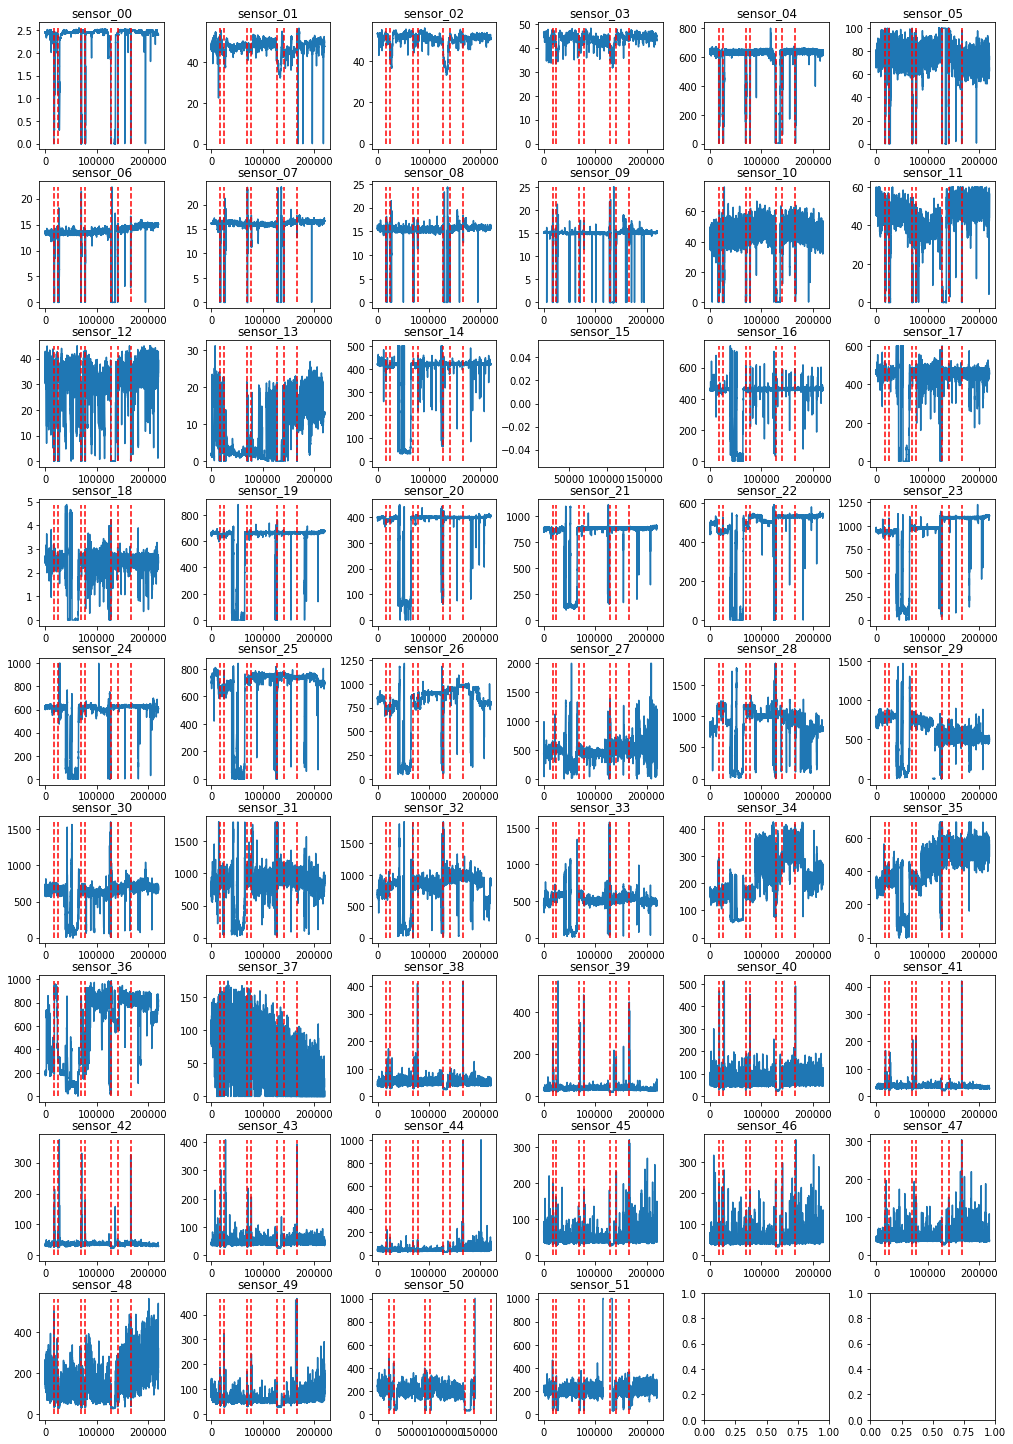

In [ ]:
# Verificando o comportamento das falhas passadas em cada sensor
ymin = 0
i = 0
fig, axs = plt.subplots(9, 6, figsize = (14,20))
fig.tight_layout()

for x0 in list(range(0, 9, 1)):
    #print('x0', x0)
    for y0 in list(range(0, 6, 1)):
        #print('x0 and y0', x0,  y0)
        if i < 10:
            sensor_number = 'sensor_0{}'.format(i)
            ymax = df[sensor_number].max()
        elif i > 51:
            break
        else:
            sensor_number = 'sensor_{}'.format(i)
        ymax = df[sensor_number].max()
        axs[x0, y0].plot(df[sensor_number])
        axs[x0, y0].set_title(sensor_number)
        axs[x0, y0].vlines(x = df[df['machine_status'] == 'BROKEN'].index, ymin = ymin, ymax = ymax, color='red', linestyle='--')
        i = i + 1


In [ ]:
# VErificando informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
# verificação de dados faltantes por coluna
df.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


In [ ]:
# verificar a porcentagem de dados faltantes por coluna
(df.isnull().sum() / df.shape[0]) * 100

Unnamed: 0          0.000000
timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.007262
sensor_32     

In [ ]:
# verificação de percentual de dados faltantes ordenados
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
calc_percent_NAs(df).head(53)

,percent
sensor_15,1.000000
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185


In [ ]:
#verificando o sensor_15 de perto
df.sensor_15.isnull().sum()
df['sensor_15']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
220315   NaN
220316   NaN
220317   NaN
220318   NaN
220319   NaN
Name: sensor_15, Length: 220320, dtype: float64

#2 Limpeza dos dados
*   Remover colunas redudantes
*   Remover duplicatas
*   Subtituição de valores NaN
*   Normalizar os dados

---------------------------------------------------------------------


## 2.1 Remover colunas colunas não necessárias

In [ ]:
# Excluir coluna sensor_15, já que esta com 100% de dados faltantes
del df['sensor_15']

In [ ]:
# Excluir coluna Unnamed: 0
del df['Unnamed: 0']

In [ ]:
# remover dados duplicados caso tenha
df = df.drop_duplicates()

## 2.2 Substituição de valores NaN

In [ ]:
# substituir valores faltantes pela média
df.fillna(value='0', inplace=True)

In [ ]:
# verificar se ainda existe NaN
df.isnull().values.any()

False

In [ ]:
# verificar dados faltantes
df.isnull().sum().sum()

0

## 2.3 Normalização dos dados

In [ ]:
columns_to_normalize = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# cria um objeto MinMaxScaler
scaler = MinMaxScaler()

# normaliza as colunas especificadas na lista columns_to_normalize
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [ ]:
# Visulaização dos dados apos tratamento
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,0.967194,0.830145,0.949651,0.960396,0.792969,0.764598,0.602731,0.683630,0.639334,...,0.102613,0.039641,0.205059,0.137500,0.125834,0.281298,0.145794,0.243056,0.201389,NORMAL
1,2018-04-01 00:01:00,0.967194,0.830145,0.949651,0.960396,0.792969,0.764598,0.602731,0.683630,0.639334,...,0.102613,0.039641,0.205059,0.137500,0.125834,0.281298,0.145794,0.243056,0.201389,NORMAL
2,2018-04-01 00:02:00,0.959089,0.834736,0.949651,0.962196,0.798611,0.735461,0.598829,0.679645,0.641414,...,0.101976,0.039352,0.204155,0.138281,0.125834,0.277692,0.144548,0.241319,0.203704,NORMAL
3,2018-04-01 00:03:00,0.965264,0.830145,0.948877,0.962196,0.785156,0.769891,0.598505,0.688535,0.644682,...,0.100064,0.039062,0.202349,0.138281,0.125834,0.277692,0.143925,0.240451,0.203125,NORMAL
4,2018-04-01 00:04:00,0.959475,0.830910,0.949651,0.962196,0.795573,0.765891,0.600130,0.687002,0.644682,...,0.101338,0.038773,0.203252,0.139844,0.127741,0.281814,0.143302,0.242188,0.201389,NORMAL


# 3. Análise Exploratória dos dados (EDA)

* Análise descritiva dos dados
* Análise PCA


##3.1 Análise descritiva 

In [ ]:
# Análise Descritiva
print(df.describe())

           sensor_00      sensor_01      sensor_02      sensor_03  \
count  220320.000000  220320.000000  220320.000000  220320.000000   
mean        0.887523       0.837547       0.907733       0.907264   
std         0.251418       0.067442       0.065978       0.050864   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.949054       0.816373       0.899303       0.888389   
50%         0.963335       0.848508       0.921766       0.917192   
75%         0.980702       0.872226       0.941905       0.939694   
max         1.000000       1.000000       1.000000       1.000000   

           sensor_04      sensor_05      sensor_06      sensor_07  \
count  220320.000000  220320.000000  220320.000000  220320.000000   
mean        0.738279       0.733902       0.593565       0.654804   
std         0.180153       0.173109       0.130742       0.139154   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.783276       0.6997

##3.2 Análise de PCA

In [ ]:
X = df.iloc[:, 2:52].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
df2 = df.drop(['machine_status'], axis=1)
names=df.columns

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

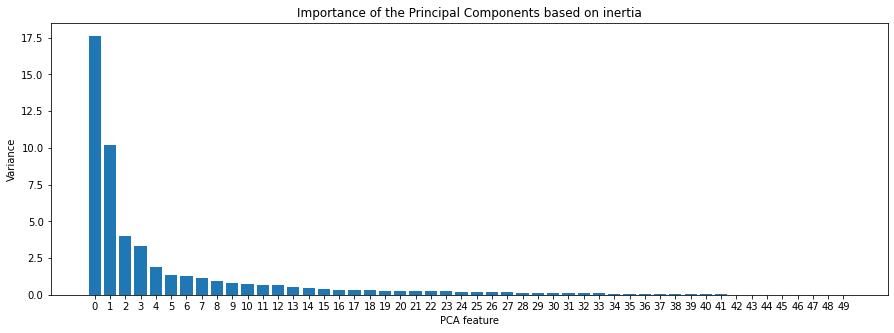

In [ ]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [ ]:
# Calcula PCA com 2 componentes 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
# calculo do p-valor
from statsmodels.tsa.stattools import adfuller 
# Run Augmented Dickey Fuller Test 
result = adfuller(principalDf['pc1']) 
# Print p-value 
print(result[1])

0.00019413841763087344


In [ ]:
df3 = df.iloc[:, 1:9]

In [ ]:
# visualização dos valores dos 2 componentes principais
print(pca.explained_variance_ratio_)

[3.52286543e-01 2.03228767e-01 7.97845793e-02 6.58720555e-02
 3.83672815e-02 2.73893126e-02 2.52816041e-02 2.23119165e-02
 1.81600556e-02 1.58289025e-02 1.42533503e-02 1.36646357e-02
 1.28070338e-02 1.04381055e-02 9.10365465e-03 7.73045042e-03
 7.18728323e-03 6.64630909e-03 5.87612459e-03 5.56308626e-03
 5.25071575e-03 4.76280772e-03 4.70043753e-03 4.53464998e-03
 4.16681415e-03 3.89406977e-03 3.66067092e-03 3.37797072e-03
 3.09725615e-03 2.53992072e-03 2.23669340e-03 2.11663189e-03
 1.99058770e-03 1.82179341e-03 1.49322100e-03 1.48360175e-03
 1.34466026e-03 1.05637468e-03 9.29696297e-04 8.61372048e-04
 8.12251018e-04 7.85501166e-04 3.84968450e-04 2.81686999e-04
 1.80763475e-04 1.66139893e-04 1.24249276e-04 1.05719838e-04
 3.33542565e-05 2.43686908e-05]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

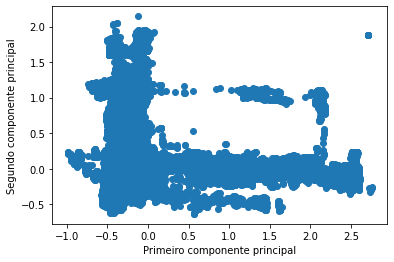

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='jet')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

In [ ]:
#matriz de correlação dos dados
corr_matrix = df3.corr()
print(corr_matrix)

              pc1           pc2
pc1  1.000000e+00 -4.192911e-15
pc2 -4.192911e-15  1.000000e+00


In [ ]:
#matriz de correlação dos dados
corr_matrix = df.corr()
print(corr_matrix)

           sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
sensor_00   1.000000   0.561528   0.815552   0.669461   0.967510   0.479611   
sensor_01   0.561528   1.000000   0.645645   0.594302   0.588610   0.152514   
sensor_02   0.815552   0.645645   1.000000   0.825496   0.817888   0.263923   
sensor_03   0.669461   0.594302   0.825496   1.000000   0.678857   0.150372   
sensor_04   0.967510   0.588610   0.817888   0.678857   1.000000   0.387145   
sensor_05   0.479611   0.152514   0.263923   0.150372   0.387145   1.000000   
sensor_06   0.860290   0.590595   0.786609   0.702768   0.881311   0.300635   
sensor_07   0.803772   0.571026   0.757685   0.660859   0.821359   0.245536   
sensor_08   0.759372   0.570421   0.736034   0.649785   0.793196   0.192653   
sensor_09   0.739734   0.573963   0.752813   0.660491   0.770387   0.193320   
sensor_10   0.936857   0.512374   0.754063   0.616275   0.907615   0.441670   
sensor_11   0.884491   0.482931   0.708972   0.66791

<AxesSubplot:>

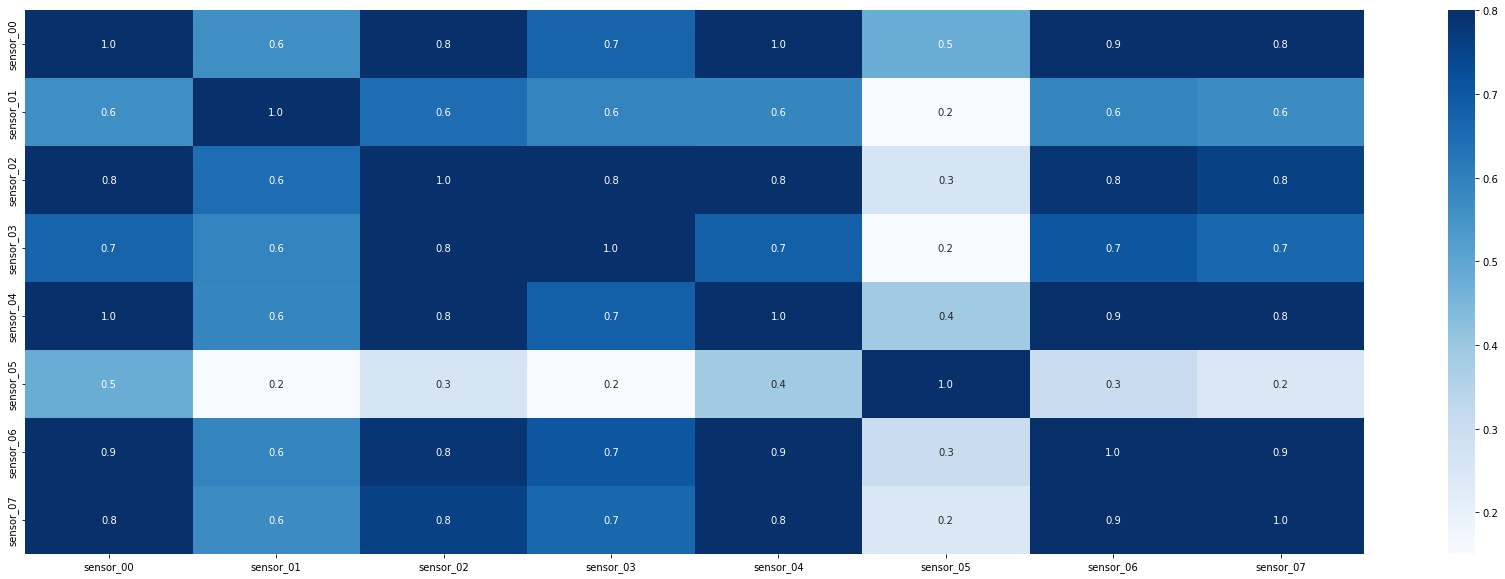

In [ ]:
plt.figure(figsize=(30,10))
correlation=df3.corr()
sns.heatmap(correlation,cbar=True,fmt='.1f',vmax=0.8,annot=True,cmap='Blues')

<AxesSubplot:>

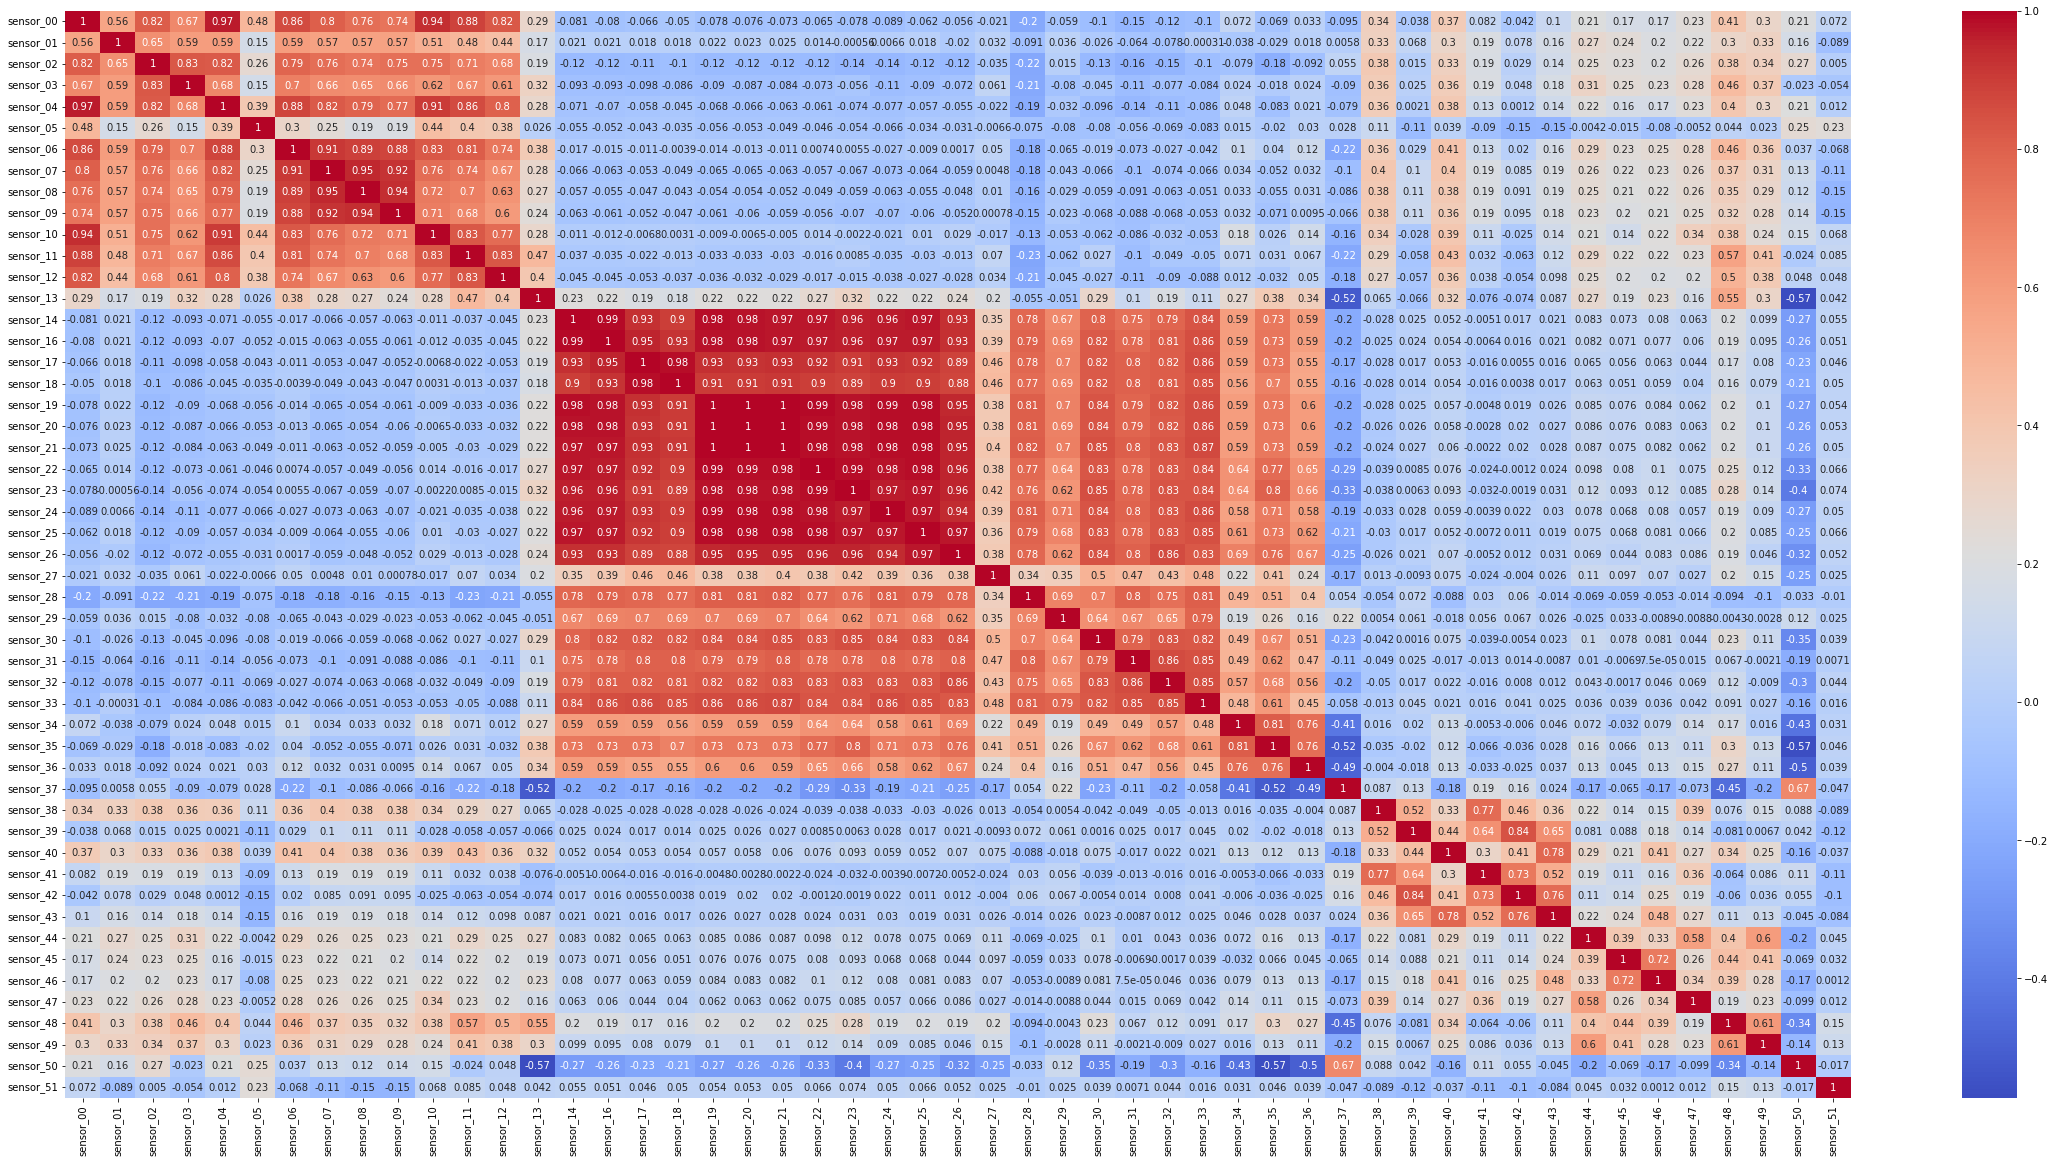

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

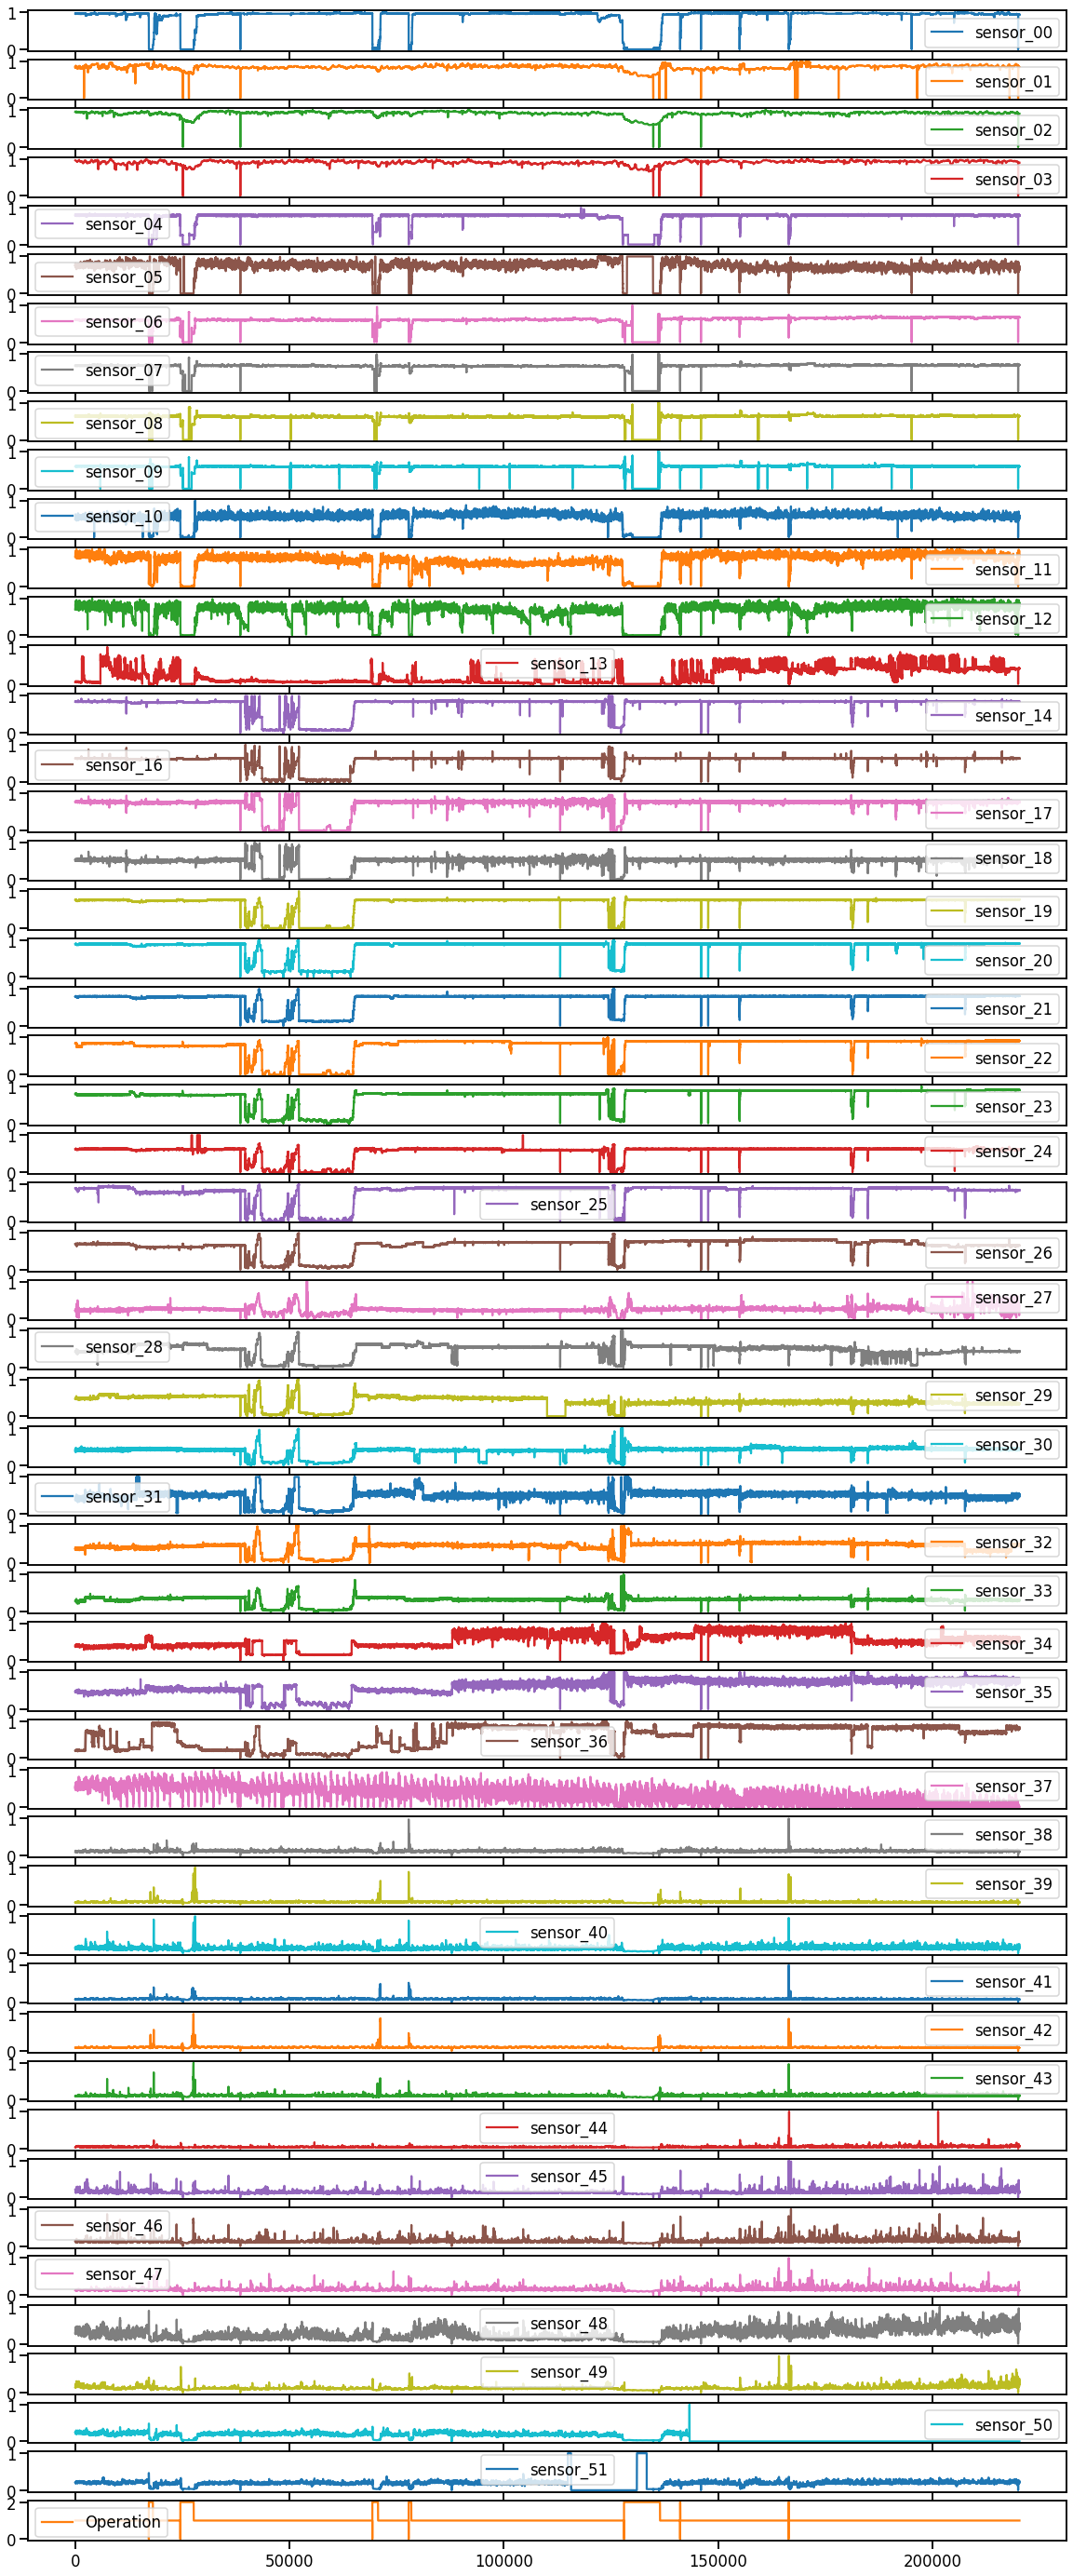

In [ ]:
# Plotando as séries dos sensores e da classe criada Operation, para visualização geral
status = [(df['machine_status'] == 'NORMAL'), (df['machine_status'] == 'BROKEN'), (df['machine_status'] == 'RECOVERING')]
label_encoding = [1, 0, 2]
df['Operation'] = np.select(status, choices, default=0)
df.plot(subplots=True, sharex=True, figsize=(20, 50))

# 4 . Relatório




##.1 Link

[Relatório](https://docs.google.com/document/d/15h1WUqviVlY2gSTWgOSGbKu-0tmSvlnLP4Kkp3RycHU/edit?usp=sharing)
```
https://docs.google.com/document/d/15h1WUqviVlY2gSTWgOSGbKu-0tmSvlnLP4Kkp3RycHU/edit?usp=sharing
```

